In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# reviews shape (568454, 10)
reviews = pd.read_csv('/Users/ZhengYuxin/Desktop/Reviews.csv')
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
# delete rows that Profile Name is null
reviews = reviews.loc[~reviews['ProfileName'].isnull(), :]
reviews['ProfileName'].isnull().sum()

0

In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568438 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568438 non-null  int64 
 1   ProductId               568438 non-null  object
 2   UserId                  568438 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568438 non-null  int64 
 5   HelpfulnessDenominator  568438 non-null  int64 
 6   Score                   568438 non-null  int64 
 7   Time                    568438 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568438 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [6]:
reviews = reviews.loc[~(reviews['HelpfulnessNumerator'] > reviews['HelpfulnessDenominator']),:]

In [7]:
# Delete the reviews that did not get any vote - HelpfulnessDenominator
reviews = reviews.loc[reviews['HelpfulnessDenominator'] != 0, :]

In [8]:
reviews['HelpfulOrNot'] = [1 if i > 1 else 0 for i in reviews['HelpfulnessNumerator']]
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulOrNot
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,0


Text(0.5, 1.0, 'Helpfulneess Numerator Distribution')

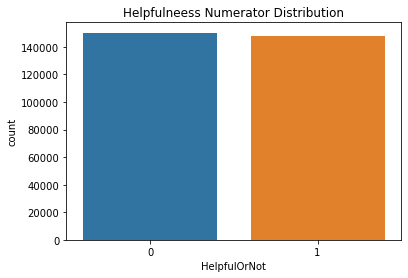

In [9]:
ax = sns.countplot(x = 'HelpfulOrNot', data = reviews, order = reviews['HelpfulOrNot'].value_counts().index)
ax.set_title('Helpfulneess Numerator Distribution')

In [10]:
reviews['HelpfulOrNot'].value_counts(normalize = True)

0    0.503489
1    0.496511
Name: HelpfulOrNot, dtype: float64

Text(0.5, 1.0, 'Score Distribution')

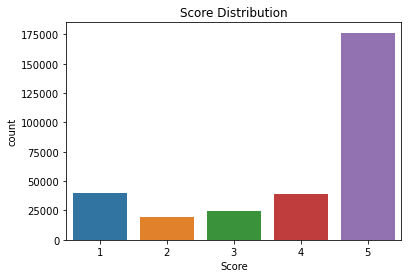

In [11]:
ax = sns.countplot(x = 'Score', data = reviews)
ax.set_title('Score Distribution')

In [12]:
Score_Helpfulness = pd.crosstab(reviews['Score'],reviews['HelpfulOrNot'])
Score_Helpfulness

HelpfulOrNot,0,1
Score,,
1,19347,20653
2,10633,8532
3,13788,10429
4,20985,17653
5,85486,90890


<Figure size 432x288 with 0 Axes>

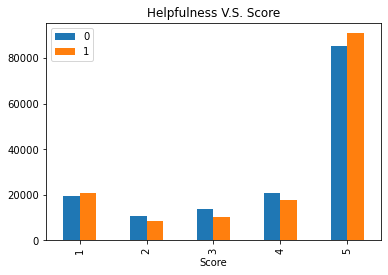

In [13]:
plt.figure()
Score_Helpfulness .plot(kind = 'bar')
plt.legend()
plt.title('Helpfulness V.S. Score')
plt.show()

(0.0, 9000.0)

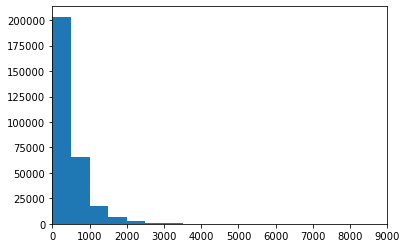

In [14]:
import matplotlib.pyplot as plt
length = reviews['Text'].str.len()
bins_list = list(range(0, 9000, 500))
plt.hist(length, bins = bins_list)
plt.xlim(xmin = 0, xmax = 9000)

In [15]:
import re
import string
import nltk
from nltk.corpus import wordnet
# nltk.download('stopwords')
from nltk.corpus import stopwords
# nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
# !pip install unidecode
import unidecode
# !pip install autocorrect
from autocorrect import Speller

In [16]:
#url
def url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [17]:
#html
def html(text):
    return re.compile(r'<.*?>').sub(r'',text)

In [18]:
# punctuation
def pun(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

In [19]:
# remove accents
def accents(text):
    return unidecode.unidecode(text)

In [20]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[0-9]+','',text)
    return text

In [21]:
# remove extra white spaces between each word
def whitespaces(text):
    return ' '.join(text.split()) 

In [22]:
reviews['Text'] = reviews['Text'].apply(lambda x: url(x))
reviews['Text'] = reviews['Text'].apply(lambda x : html(x))
reviews['Text'] = reviews['Text'].apply(lambda x : pun(x))
reviews['Text'] = reviews['Text'].apply(lambda x : accents(x))
reviews['Text'] = reviews['Text'].apply(lambda x: clean(x))
reviews['Text'] = reviews['Text'].apply(lambda x: whitespaces(x))

In [23]:
# stopwords
stop_words = stopwords.words('english')
def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

In [24]:
# lemmatizer(remove inflectional endings)
lemmatizer = WordNetLemmatizer()
def lemmatization_text(text):
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split(' '))
    return text

In [25]:
def clean1(text): 
    text = re.sub(r"wont", "will not", text)
    text = re.sub(r"cant", "can not", text)
    text = re.sub(r"wasnt", "was not", text)
    text = re.sub(r"arent", "are not", text)
    text = re.sub(r"werent", "were not", text)    
    text = re.sub(r"isnt", "is not", text)
    text = re.sub(r"havent", "have not", text)
    text = re.sub(r"hasnt", "has not", text)
    text = re.sub(r"shouldnt", "should not", text)
    text = re.sub(r"wouldnt", "would not", text)
    text = re.sub(r"didnt", "did not", text)
    text = re.sub(r"dont", "do not", text)
    text = re.sub(r"aint", "am not", text)
    return text

In [26]:
reviews['Stopwords'] = reviews['Text'].apply(lambda x: remove_stopwords(x))
reviews['Lemmatization'] = reviews['Stopwords'].apply(lambda x: lemmatization_text(x))
reviews['Lemmatization'] = reviews['Lemmatization'].apply(lambda x: clean1(x))

In [27]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulOrNot,Stopwords,Lemmatization
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...,0,bought several vitality canned dog food produc...,bought several vitality canned dog food produc...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...,0,confection around centuries light pillowy citr...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...,1,looking secret ingredient robitussin believe f...,looking secret ingredient robitussin believe f...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,right now im mostly just sprouting this so my ...,0,right im mostly sprouting cats eat grass love ...,right im mostly sprouting cat eat grass love r...
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,i dont know if its the cactus or the tequila o...,0,dont know cactus tequila unique combination in...,do not know cactus tequila unique combination ...


In [28]:
corpus=[]
review_split = reviews['Lemmatization'].str.split()
reviews_split = review_split.values.tolist()
corpus=[word for i in reviews_split for word in i]

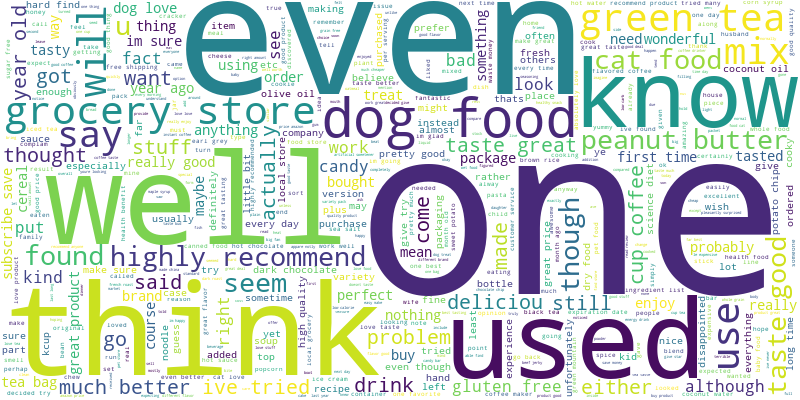

In [37]:
from wordcloud import WordCloud
string = ','.join(list(reviews['Lemmatization'].values))
wordcloud = WordCloud(background_color="white", max_words=500, width=800, height=400, 
                      contour_width=20, contour_color='maroon')
wordcloud.generate(string)
wordcloud.to_image()